#### Import necessary libraries for data manipulation, visualization, and analysis

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [49]:
# load the data

In [50]:
data=pd.read_csv('RestaurantDataset.csv')

In [51]:
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [52]:
# Check for null values in the data
data.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

There are 9 missing values in Cuisines colum.

In [54]:
# Find the mode of the Cuisines column
mode_cuisine = data['Cuisines'].mode()[0]

print("Mode of Cuisines column:", mode_cuisine)

Mode of Cuisines column: North Indian


In [55]:
# Replace missing values in 'Cuisines' 

data.loc[data['Cuisines'].isnull(), 'Cuisines'] = 'North Indian'

In [56]:
# Verify that there are no missing values in 'Cuisines' now

print(f"Missing values in 'Cuisines': {data['Cuisines'].isnull().sum()}")

Missing values in 'Cuisines': 0


### Task 1: * Table Booking and Online Delivery *  

#### 1. Determine the percentage of restaurants that offer table booking and online delivery

In [59]:
# Convert the 'Has Table booking' and 'Has Online delivery' columns to lowercase for consistent comparison in subsequent analysis
data['Has Table booking']=data['Has Table booking'].str.lower()
data['Has Online delivery']=data['Has Online delivery'].str.lower()

# Calculate the total number of restaurants in the dataset
total_restaurants = len(data)

# Calculate the percentage of restaurants offering table booking and online delivery

table_booking_percent = (((data['Has Table booking'] == 'yes').sum())/total_restaurants) * 100
no_table_booking_percent = 100 - table_booking_percent

online_delivery_percent = (((data['Has Online delivery'] == 'yes').sum())/total_restaurants) * 100
no_online_delivery_percent = 100 - online_delivery_percent 

# Print the calculated percentage of restaurants offering table booking and online delivery
print(f'Percentage of restaurants offering table booking: {round(table_booking_percent, 2)}%') 
print(f'Percentage of restaurants offering online delivery: {round(online_delivery_percent, 2)}%')


Percentage of restaurants offering table booking: 12.12%
Percentage of restaurants offering online delivery: 25.66%


In [60]:
# Visualizing the percentage of restaurants offering Table Booking and Online Delivery

Text(0.5, 1.0, 'Online Delivery Availability')

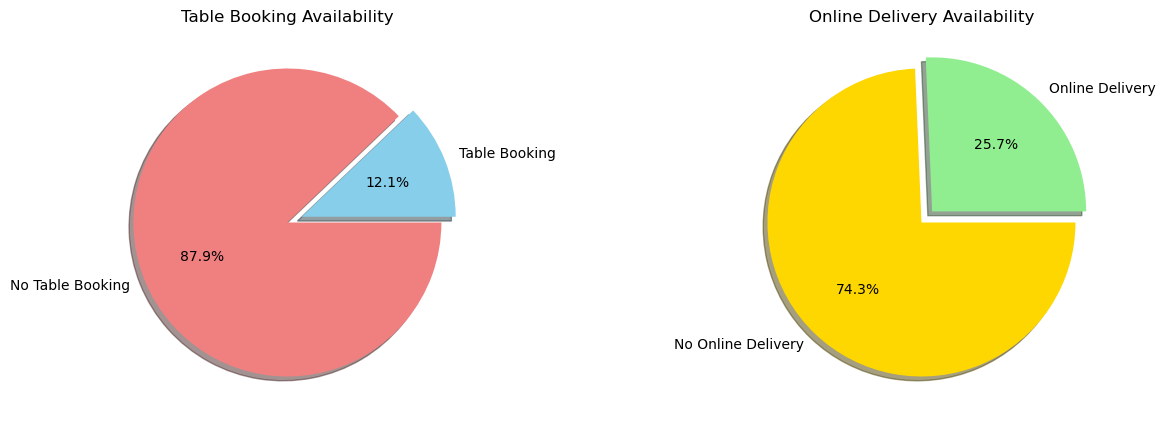

In [61]:
# Create a data for Pie Charts: Percentages of restaurants offering Table Booking and Online Delivery, with labels and sizes .
table_booking_lables = ['Table Booking','No Table Booking']
table_booking_sizes = [table_booking_percent,no_table_booking_percent]

online_delivery_lables = ['Online Delivery' , 'No Online Delivery']
online_delivery_sizes = [online_delivery_percent , no_online_delivery_percent]

# Create 1 row and 2 columns of subplots with a custom figure size
fig, axs = plt.subplots(1,2,figsize=(15,5))

# Plotting two pie charts side by side 
axs[0].pie(table_booking_sizes,
       labels=table_booking_lables,
       autopct = '%1.1f%%',
       colors=['skyblue','lightcoral'],
       explode = (0.1,0),
       shadow = True
          )
axs[0].set_title('Table Booking Availability')

axs[1].pie(online_delivery_sizes,
       labels=online_delivery_lables,
       autopct = '%1.1f%%',
       colors = ['lightgreen','gold'],
       explode = (0.1,0),
       shadow = True
          )
axs[1].set_title('Online Delivery Availability')

* **12.12%** of restaurants provide table booking, showing that it's not a common feature, potentially due to operational limitations or customer preferences for walk-ins.

* **25.66%** offer online delivery, highlighting a stronger trend toward convenience and the increasing reliance on delivery services in the restaurant industry.

* This suggests a potential opportunity to increase table booking options and expand or optimize online delivery services for better customer reach.

#### 2. Comapare the average ratings of restaurants with table booking and those without

In [64]:
# Filter the dataset into two groups:
with_table_booking = data[data['Has Table booking']=='yes']
without_table_booking = data[data['Has Table booking']=='no']

# Calculate the average ratings for restaurants:
avg_rating_with_booking = with_table_booking['Aggregate rating'].mean()
avg_rating_without_booking = without_table_booking['Aggregate rating'].mean()

# Display the average ratings for restaurants with and without table booking
print(f'Average ratings of restaurants with table booking :{round(avg_rating_with_booking,2)}%')
print(f'Average ratings of restaurants without table booking :{round(avg_rating_without_booking,2)}%')


Average ratings of restaurants with table booking :3.44%
Average ratings of restaurants without table booking :2.56%


In [65]:
# Visualizing the average ratings of restaurants with table booking and those without¶

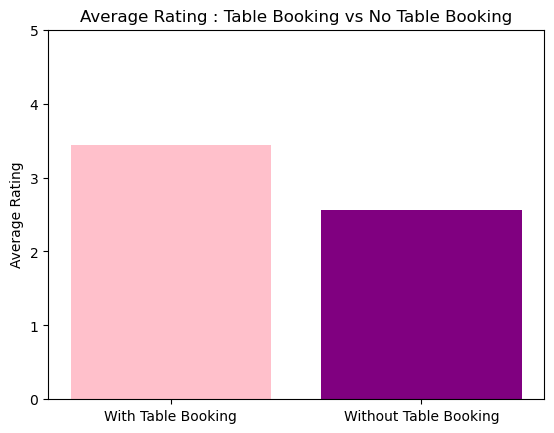

In [66]:
# Plotting a bar chart to compare the average ratings of restaurants with and without table booking.
labels = ['With Table Booking','Without Table Booking']
avg_ratings = [avg_rating_with_booking,avg_rating_without_booking]

plt.bar(labels,avg_ratings,color=['pink','purple'])
plt.ylabel('Average Rating')
plt.title('Average Rating : Table Booking vs No Table Booking')
plt.ylim(0,5)
plt.show()

* Restaurants with table booking have an average rating of 3.44, which is significantly higher than the 2.56 average rating of restaurants without table booking.

* This suggests that restaurants offering table booking may provide better service, ambiance, or overall customer experience, leading to higher customer satisfaction and better ratings.

* The bar chart visually highlights this difference, emphasizing the value of table booking as a service feature for improving customer perception and satisfaction.



#### 3. Analyze the availability of online delivery among restaurants with different price ranges

Price range
1    15.774077
2    41.310633
3    29.190341
4     9.044369
Name: Has Online delivery, dtype: float64


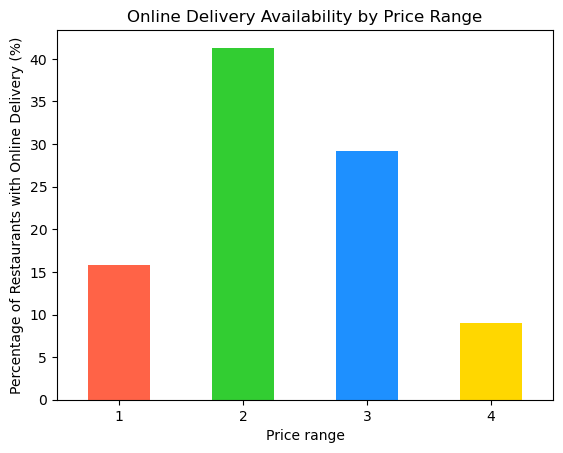

In [69]:
# Group by price range and calculate online delivery availability
price_range_groups = data.groupby('Price range')['Has Online delivery']
online_delivery_stats = price_range_groups.apply(lambda x: (x == 'yes').mean() * 100)

# Print results
print(online_delivery_stats)

# Define a list of colors for each bar (one color per price range)
colors = ['#FF6347', '#32CD32', '#1E90FF', '#FFD700']  

# Visualization with different colors for each bar
online_delivery_stats.plot(kind='bar', color=colors)

plt.ylabel('Percentage of Restaurants with Online Delivery (%)')
plt.title('Online Delivery Availability by Price Range')
plt.xticks(rotation=0)
plt.show()

* Restaurants in the **medium price range** are leading the trend of offering online            delivery, likely due to a balance of affordability and customer demand for      convenience.   High-end and luxury restaurants seem to offer online delivery less frequently, which      could be due to the personalized, dine-in experiences they offer.

### Task 2: * Price Range Analysis * 

#### 2. Determine the most common price range among all the restaurants.

In [73]:
# Find the most common price range
most_common_price_range = data['Price range'].mode()[0]

# Print the most common price range
print('The most common price range is :',most_common_price_range)

The most common price range is : 1


In [74]:
# Visualize the distribution of price ranges

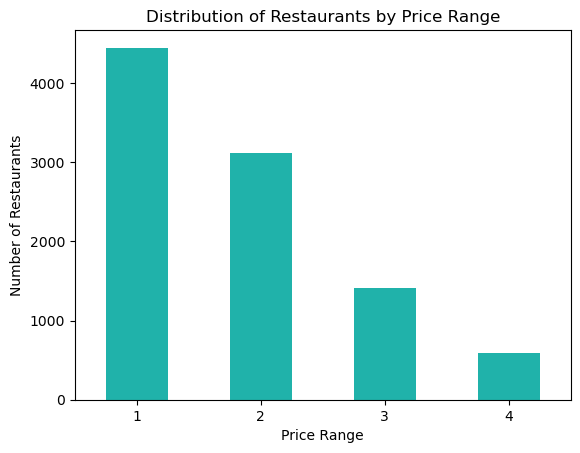

In [75]:
price_range_counts = data['Price range'].value_counts()

# Plotting the bar chart
price_range_counts.plot(kind='bar',color='lightseagreen')
plt.xlabel('Price Range')
plt.ylabel('Number of Restaurants')
plt.title('Distribution of Restaurants by Price Range')
plt.xticks(rotation=0)
plt.show()

* The most common price range is 1, which likely represents low-priced restaurants.

* This suggests that the majority of restaurants in the dataset are catering to more affordable dining options, appealing to budget-conscious customers or those seeking quick, inexpensive meals.

* It may also indicate that the restaurant industry in this dataset has a larger proportion of casual, fast-food, or budget-friendly establishments compared to higher-end ones

#### 2. Calculate the average rating for each price range.

In [78]:
# Group by 'Price range' and calculate the average rating for each group
avg_ratings_by_price = data.groupby('Price range')['Aggregate rating'].mean()

# Print the average ratings for each price range
print(avg_ratings_by_price)

Price range
1    1.999887
2    2.941054
3    3.683381
4    3.817918
Name: Aggregate rating, dtype: float64


In [79]:
# Visualization

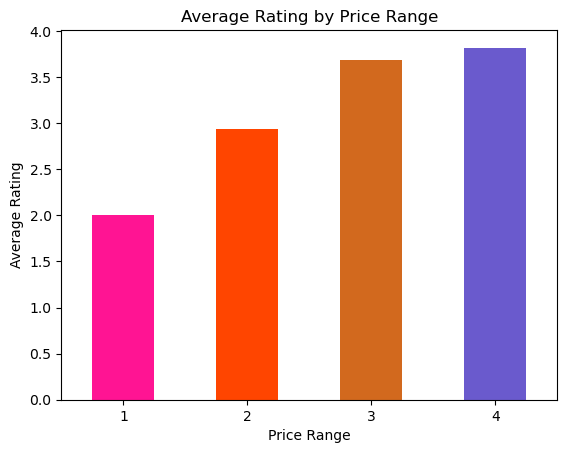

In [80]:
colors = ['#FF1493', '#FF4500', '#D2691E', '#6A5ACD']

avg_ratings_by_price.plot(kind='bar',color=colors)
plt.xlabel('Price Range')
plt.ylabel('Average Rating')
plt.title('Average Rating by Price Range')
plt.xticks(rotation=0)
plt.show()

* There is a clear trend where higher-priced restaurants tend to receive better aggregate ratings, likely due to enhanced service, food quality, and overall dining experiences. On the other hand, low-priced restaurants have lower ratings, which might be attributed to the trade-off between affordability and quality.

* A bar chart visually reinforces this trend, with a gradual increase in ratings as the price range moves from low to very high.

#### 3. Identify the color that represents the highest average rating among different price range.

In [83]:
# Step 1: Group by both 'Price range' and 'Rating color', and calculate the mean of 'Aggregate rating'
grouped_data = data.groupby(['Price range', 'Rating color'])['Aggregate rating'].mean().reset_index()
grouped_data

,Price range,Rating color,Aggregate rating
0,1,Dark Green,4.668750
1,1,Green,4.157639
2,1,Orange,3.040464
3,1,Red,2.293548
4,1,White,0.000000
5,1,Yellow,3.661842
6,2,Dark Green,4.627536
7,2,Green,4.159385
8,2,Orange,3.048491
9,2,Red,2.300000


In [84]:
# Step 2: For each price range, find the color with the highest average rating
top_colors = grouped_data.loc[grouped_data.groupby('Price range')['Aggregate rating'].idxmax()]

In [85]:
# Step 3: Display the result
print(top_colors)

    Price range Rating color  Aggregate rating
0             1   Dark Green          4.668750
6             2   Dark Green          4.627536
12            3   Dark Green          4.646032
18            4   Dark Green          4.709459


* The color **"Dark Green"** represents the highest average rating for all price ranges (1-4).

* For each price range, the average rating is the highest for Dark Green, indicating that restaurants with this rating are consistently performing well across all price points.

### Task 3: * Feature Engineering *

#### 1. Extract additional features from the existing columns, such as the length of the restaurant names or address.

In [89]:
df=data.copy()

In [90]:
# Extracting the length of restaurant names
df['Name_Length'] = df['Restaurant Name'].apply(len)

In [91]:
# Extracting the length of addresses
df['Address_Length'] = df['Address'].apply(len)

In [92]:
# Indicating if a restaurant is popular (threshold: more than 100 votes) 
df['Is_Popular'] = df['Votes'] > 100

In [93]:
# Extracting the number of cuisines 
df['cuisine_count'] = df['Cuisines'].apply(lambda x: len(x.split(',')))

In [94]:
df.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Name_Length,Address_Length,Is_Popular,cuisine_count
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,No,3,4.8,Dark Green,Excellent,314,16,71,True,3
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,No,3,4.5,Dark Green,Excellent,591,16,67,True,1
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,No,4,4.4,Green,Very Good,270,22,56,True,4


Additional features have been extracted to enhance the dataset's analytical capabilities. 

- 'Name_Length' represents the length of the restaurant name, which can be used to explore potential correlations with ratings or popularity.
- 'Address_Length' provides the length of the restaurant address, which might give insights into the complexity or detail in location descriptions.
- 'Is_Popular' is a binary feature indicating whether a restaurant is considered popular based on having more than 100 votes, which can be useful for analyzing customer engagement.
- 'cuisine_count' represents the number of different cuisines offered by the restaurant, adding a layer of diversity insight to the dataset.

These additional features will help further analyze restaurant characteristics and their relationship to customer satisfaction, pricing, and popularity.

#### 2. Create new features like "Has Table Booking"or "Has Online Delivery" by encoding categorical variables

In [97]:
# Encoding 'Has Table booking'

In [98]:
df['Has Table booking'].unique()

array(['yes', 'no'], dtype=object)

In [99]:
df['Has_Table_Booking'] = df['Has Table booking'].map({'yes': 1, 'no': 0})

In [100]:
# Encoding 'Has Online delivery'

In [101]:
df['Has Online delivery'].unique()

array(['no', 'yes'], dtype=object)

In [102]:
df['Has_Online_Delivery'] = df['Has Online delivery'].map({'yes': 1, 'no': 0})

In [103]:
# Encoding 'Is delivering now'

In [104]:
df['Is delivering now'].unique()

array(['No', 'Yes'], dtype=object)

In [105]:
df['Is_delivering_now'] = df['Is delivering now'].map({'Yes': 1, 'No': 0})

In [106]:
# Encoding 'Rating color'

In [107]:
df['Rating color'].unique()

array(['Dark Green', 'Green', 'Yellow', 'Orange', 'White', 'Red'],
      dtype=object)

In [108]:
df['Rating_color'] = df['Rating color'].map({'Dark Green':5, 'Green':4, 'Yellow':3, 'Orange':2, 'White':1, 'Red':0})

In [109]:
# Encoding 'Rating text'

In [110]:
df['Rating text'].unique()

array(['Excellent', 'Very Good', 'Good', 'Average', 'Not rated', 'Poor'],
      dtype=object)

In [111]:
df['Rating_text'] = df['Rating text'].map({'Excellent':5, 'Very Good':4, 'Good':3, 'Average':2, 'Not rated':1, 'Poor':0})

In [112]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Votes,Name_Length,Address_Length,Is_Popular,cuisine_count,Has_Table_Booking,Has_Online_Delivery,Is_delivering_now,Rating_color,Rating_text
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,314,16,71,True,3,1,0,0,5,5
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,591,16,67,True,1,1,0,0,5,5
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,270,22,56,True,4,1,0,0,4,4
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,365,4,70,True,2,0,0,0,5,5
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,229,11,64,True,2,1,0,0,5,5


 Categorical variables have been successfully encoded into numerical features for easier analysis:

- 'Has Table booking', 'Has Online delivery', and 'Is delivering now' have been encoded as binary values (1 for 'Yes', 0 for 'No'), making it easier to analyze the presence of these services and their impact on restaurant performance.
- 'Rating color' has been encoded into numerical values to enable quantitative analysis of different rating categories.
- 'Rating text' has also been encoded to represent categorical ratings like 'Excellent', 'Good', etc., allowing further exploration of customer satisfaction levels.

These new encoded features will enable better modeling, allow for more advanced analysis, and help uncover insights related to restaurant services and customer feedback.

#### Here’s a concise overview of my findings

**Task 1: Table Booking and Online Delivery** 

Percentage of Restaurants Offering Table Booking and Online Delivery:

Only 12.12% of restaurants offer table booking, which might be due to operational limits or customer preference for walk-ins.
25.66% offer online delivery, which shows a stronger trend toward convenience and the growing demand for delivery services.
Average Ratings for Restaurants with and Without Table Booking:

Restaurants with table booking have a higher average rating of 3.44 compared to 2.56 for those without it. This suggests that offering table booking may lead to better customer satisfaction and ratings.
Online Delivery Across Price Ranges:

Medium-priced restaurants are leading in offering online delivery, likely due to the balance between affordability and convenience.
High-end restaurants offer delivery less often, as they focus more on personalized, in-person dining experiences.

Conclusion: There's a clear opportunity to improve customer satisfaction by increasing table booking options and expanding online delivery, especially in medium-priced restaurants where the demand for convenience is higher.

**Task 2: Price Range Analysis**

Most Common Price Range:
Most restaurants fall under price range 1, meaning they are budget-friendly and likely focus on casual or fast-food options for cost-conscious customers.

Ratings by Price Range:
Restaurants with higher prices get better ratings, likely because of better food, service, and overall experience. Cheaper restaurants usually have lower ratings due to a focus on affordability over quality.

Top-Rated Color:
Dark Green shows the highest average ratings across all price ranges, meaning restaurants with this rating perform well regardless of their price.

**Task 3: Feature Engineering**

New Features:
Added features like Name_Length, Address_Length, Normalized_Rating, Is_Popular, and cuisine_count to explore patterns, value for money, and popularity trends.

Encoded Features:
Converted Has Table booking, Has Online delivery, Is delivering now, Rating color, and Rating text into numerical values for easier analysis of services and customer feedback.